## Import the modules


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load the MNIST dataset from Keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
# Finding the shape of individual sample
x_train[0].shape

(28, 28)

hence, each sample is a 28x28 pixel image

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The value ranges 0-255. 0 means the pixel at that point has no intensity and 255 has the highest intensity.

## See the images

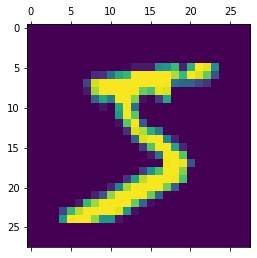

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
# Show first 5 data
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten the training data
we need to convert the two dimensional input data into a single dimensional format for feeding into the model.
This is achieved by a process called flattening. In this process the 28x28 grid image is converted into a single dimensional array of 784(28x28).

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
x_train_flattened.shape

(60000, 784)

## PART 1 - Create a simple neural network in keras

In [ ]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
print(model.summary())

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4661 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9255


## Evaluate the accuracy on test data

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9238


[0.2717801332473755, 0.923799991607666]

## Sample prediction

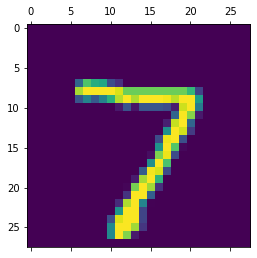

In [ ]:
# Show the image
plt.matshow(x_test[0])

In [ ]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([1.2718408e-02, 3.0813976e-07, 4.3348182e-02, 9.5068675e-01,
       1.8624080e-03, 8.9633152e-02, 7.8308545e-07, 9.9968755e-01,
       1.1380154e-01, 6.1119252e-01], dtype=float32)

In [ ]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [ ]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Using confusion matrix for validation

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    3,    0,    5,    6,    3,    4,    1],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    9,  916,   16,    6,    5,   12,   11,   50,    4],
       [   2,    0,   15,  921,    0,   22,    2,   12,   30,    6],
       [   2,    1,    5,    2,  898,    0,    9,    4,   13,   48],
       [   9,    2,    4,   32,    8,  762,   11,    6,   50,    8],
       [   9,    3,    9,    0,    7,   13,  908,    2,    7,    0],
       [   1,    5,   21,    7,    4,    0,    0,  948,    5,   37],
       [   5,    6,    5,   15,    9,   17,    7,   10,  895,    5],
       [   9,    7,    2,    9,   21,    5,    0,   18,   12,  926]],
      dtype=int32)>

## Using seaborn to make confusion matrix look good

Text(69.0, 0.5, 'Truth')

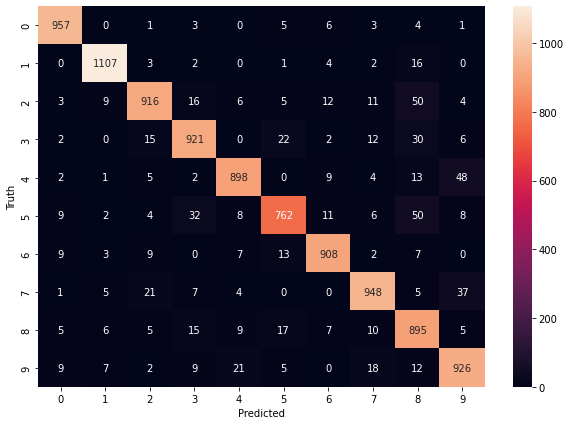

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),

    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2158 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0624 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0454 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9884


## Evaluate the accuracy on test set

In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9776


[0.0800371766090393, 0.9775999784469604]

## Using confusion matrix for validation

Text(69.0, 0.5, 'Truth')

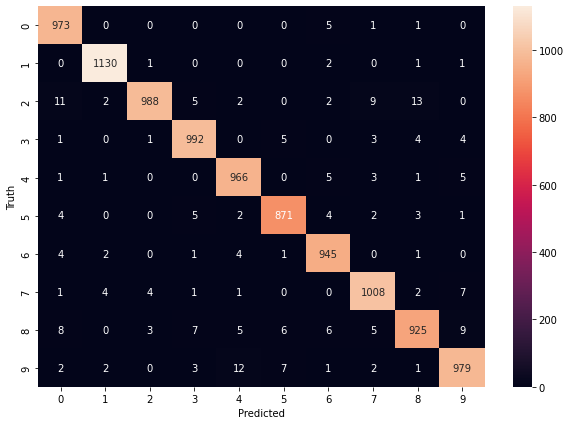

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')